# Temperature Forecast Project

### Data description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.

Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Using machine learning, we have to build a model that predicts the next day maximum and next day minimum temperature.

## Importing libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
df= pd.read_csv('temperature_forecast.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


## EDA 

In [73]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

We can check the columns of the dataset, we have two targets, next_tmax and next_tmin.

In [74]:
df.shape

(7752, 25)

Here we have 7752 rows and 25 columns to work with.

### Checking null values

In [75]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see many columns having null values, lets visualize and check.

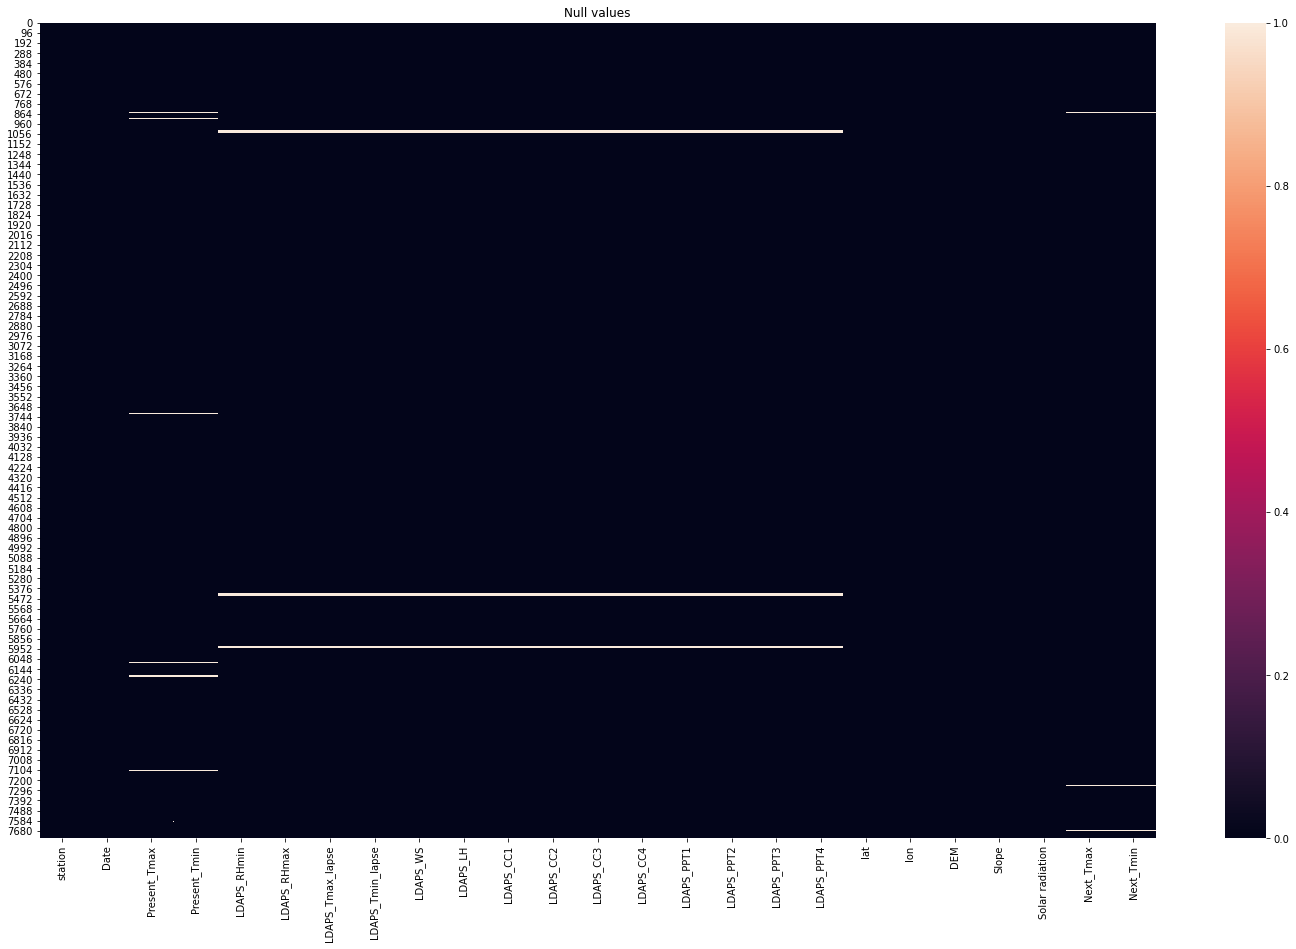

In [76]:
plt.figure(figsize=[25,15])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

We can see that the null values are grouped between certain columns.

In [77]:
df[df['Present_Tmax'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,0.890438,0.634022,0.371975,0.352818,2.645991,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,0.736160,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,0.857962,0.966186,0.959959,0.902762,4.435039,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,0.392393,0.219702,0.293890,0.178251,0.000000,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,0.517181,0.231422,0.276836,0.203288,0.000000,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,5.0,24-08-2017,NaN,NaN,38.403931,94.790405,29.929818,22.127591,5.817882,145.726477,0.104200,0.060662,0.015014,0.029818,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4677.062012,31.3,21.5
7596,22.0,24-08-2017,NaN,NaN,33.681381,91.842178,30.826400,22.978260,5.994230,103.179477,0.118850,0.107481,0.021829,0.039001,0.000000,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,4672.853027,31.6,22.4
7605,6.0,25-08-2017,NaN,NaN,24.100304,76.861076,28.999651,20.800666,6.511712,71.307767,0.000000,0.007118,0.057306,0.044800,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,4653.651855,29.5,21.5
7629,5.0,26-08-2017,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,0.079172,0.370131,0.391996,0.545452,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4602.118164,26.1,17.9


We have 70 records missing for both the present temperature max and min in the same rows, Lets treat them.

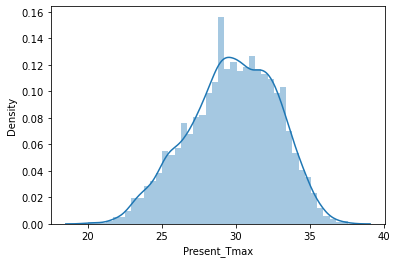

In [78]:
sns.distplot(df['Present_Tmax'])

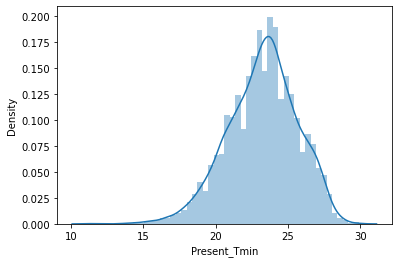

In [79]:
sns.distplot(df['Present_Tmin'])

Both the column's data are very close to a normal distribution. So we can replace the null values with mean.

In [80]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy= 'mean')

df['Present_Tmax']= imp.fit_transform(df['Present_Tmax'].values.reshape(-1,1))
df['Present_Tmin']= imp.fit_transform(df['Present_Tmin'].values.reshape(-1,1))

We have replace the null values of the above two columns.

In [81]:
df[df['station'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


The dataset should contains data from ('2013-06-30' to '2017-08-30'). But after the last date, we have the above two extra data. keeping them may effect our model, so we will drop them.

In [82]:
df[df['LDAPS_RHmin'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,10-08-2013,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,10-08-2013,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,10-08-2013,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,10-08-2013,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,10-08-2013,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,20-08-2016,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,20-08-2016,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,20-08-2016,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,20-08-2016,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


We can see there are 75 null values present in the same rows of all the 14 columns. Replacing them can effect our model performance as majority of the data in these records are null. So we will drop them.

In [83]:
df[df['Next_Tmax'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
831,7.0,02-08-2013,29.600000,25.800000,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN
856,7.0,03-08-2013,29.768211,23.225059,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,0.322410,0.071169,0.173785,0.004247,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN
1073,24.0,11-08-2013,34.200000,25.100000,50.618851,89.166397,33.414349,27.475249,6.084058,48.521008,0.254070,0.152827,0.019523,0.013130,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,NaN,NaN
2465,16.0,05-08-2014,28.800000,23.100000,71.442566,90.695419,26.273760,23.419080,3.787889,41.739802,0.260468,0.641655,0.687770,0.751662,0.000000,0.010050,0.681801,0.000000,37.4697,126.995,82.2912,2.2579,5269.604980,NaN,NaN
3696,22.0,23-07-2015,30.400000,23.400000,81.568771,93.973579,26.724457,24.984435,5.779299,58.456456,0.798225,0.739302,0.620072,0.659948,0.794114,0.711069,0.016985,0.064332,37.5102,127.086,21.9668,0.1332,5578.788086,NaN,NaN
3714,15.0,24-07-2015,24.600000,22.400000,83.265244,94.153442,26.738321,24.585545,8.048991,43.391457,0.817756,0.666070,0.763967,0.583959,0.345704,0.803824,0.190226,0.001864,37.5507,126.937,30.0464,0.8552,5578.187500,NaN,NaN
3739,15.0,25-07-2015,29.768211,23.225059,68.156593,93.874550,28.502294,24.270829,5.819343,35.236471,0.863410,0.689771,0.304014,0.064232,0.228036,1.128825,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5558.664551,NaN,NaN
3886,12.0,31-07-2015,29.768211,23.225059,64.559479,86.083702,29.628166,25.745189,8.629767,26.564901,0.783111,0.781624,0.311202,0.235075,0.003733,0.020635,0.001050,0.000000,37.5507,126.988,132.1180,0.5931,5477.556152,NaN,NaN
4205,6.0,13-08-2015,30.800000,23.900000,35.218002,82.458534,32.241880,23.018172,6.547084,63.516243,0.101724,0.068263,0.016206,0.036830,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5069.704102,NaN,NaN
4230,6.0,14-08-2015,29.768211,23.225059,43.412582,84.317780,32.028639,24.274533,5.880758,54.278856,0.140189,0.076580,0.180294,0.130072,0.000000,0.000000,0.007733,0.000000,37.5102,127.042,54.6384,0.1457,5037.928223,NaN,NaN


Here we can see both the target contains some null values in the same records. We need to drop them as we should not perform any operation on the target.

In [84]:
df.dropna(axis=0, inplace=True)

In [85]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [86]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

The null values have been treated and removed.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7648 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7648 non-null   float64
 1   Date              7648 non-null   object 
 2   Present_Tmax      7648 non-null   float64
 3   Present_Tmin      7648 non-null   float64
 4   LDAPS_RHmin       7648 non-null   float64
 5   LDAPS_RHmax       7648 non-null   float64
 6   LDAPS_Tmax_lapse  7648 non-null   float64
 7   LDAPS_Tmin_lapse  7648 non-null   float64
 8   LDAPS_WS          7648 non-null   float64
 9   LDAPS_LH          7648 non-null   float64
 10  LDAPS_CC1         7648 non-null   float64
 11  LDAPS_CC2         7648 non-null   float64
 12  LDAPS_CC3         7648 non-null   float64
 13  LDAPS_CC4         7648 non-null   float64
 14  LDAPS_PPT1        7648 non-null   float64
 15  LDAPS_PPT2        7648 non-null   float64
 16  LDAPS_PPT3        7648 non-null   float64


All the columns have equal count and are of float datatype, except 'Date' column.

In [88]:
# Lets check the unique values.

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

station
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
Date
['30-06-2013' '01-07-2013' '02-07-2013' '03-07-2013' '04-07-2013'
 '05-07-2013' '06-07-2013' '07-07-2013' '08-07-2013' '09-07-2013'
 '10-07-2013' '11-07-2013' '12-07-2013' '13-07-2013' '14-07-2013'
 '15-07-2013' '16-07-2013' '17-07-2013' '18-07-2013' '19-07-2013'
 '20-07-2013' '21-07-2013' '22-07-2013' '23-07-2013' '24-07-2013'
 '25-07-2013' '26-07-2013' '27-07-2013' '28-07-2013' '29-07-2013'
 '30-07-2013' '31-07-2013' '01-08-2013' '02-08-2013' '03-08-2013'
 '04-08-2013' '05-08-2013' '06-08-2013' '07-08-2013' '08-08-2013'
 '09-08-2013' '11-08-2013' '12-08-2013' '13-08-2013' '14-08-2013'
 '15-08-2013' '16-08-2013' '17-08-2013' '18-08-2013' '19-08-2013'
 '20-08-2013' '21-08-2013' '22-08-2013' '23-08-2013' '24-08-2013'
 '25-08-2013' '26-08-2013' '27-08-2013' '28-08-2013' '29-08-2013'
 '30-08-2013' '30-06-2014' '01-07-2014' '02-07-2014' '03-07-2014'
 '04-07-2014' '05-07-2014'

We can see the station column is categorical in nature, contains the station no. from 1 to 25. The date column contains the date of recording the data and is of object datatype. lets treat it.

In [89]:
# Converting the object datatype to datetime.

df['Date']= pd.to_datetime(df['Date']) 

In [90]:
# Extracting the day, month and year from the date column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month 
df['Year']=df['Date'].dt.year

In [91]:
# We have extracted the data from the column, we can drop the 'date column now.

df.drop(['Date'], axis=1, inplace=True)

In [92]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [93]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                   int64
Month                 int64
Year                  int64
dtype: object

Now all the column's datatype are numeric in nature, we can proceed.

### Encoding

In [94]:
df['Year'].value_counts()

2014    1549
2015    1542
2017    1538
2013    1522
2016    1497
Name: Year, dtype: int64

The column year contains 5 different years among the data. This is a categorical data. lets encode it. 

In [95]:
# using Ordinal encoder for the encoding.

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

df['Year']= enc.fit_transform(df['Year'].values.reshape(-1,1))

In [96]:
df['Year'].value_counts()

1.0    1549
2.0    1542
4.0    1538
0.0    1522
3.0    1497
Name: Year, dtype: int64

The data has been encoded.

In [97]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000,7648.000000
mean,13.008237,29.748522,23.196039,56.740769,88.371467,29.616654,23.512217,7.095360,62.458809,0.368452,0.355763,0.318088,0.299043,0.588740,0.481598,0.275122,0.267333,37.544754,126.991373,61.914375,1.258384,5344.256344,30.238010,22.910774,16.339174,7.067338,1.997385
std,7.214062,2.955737,2.391444,14.642985,7.190904,2.942035,2.342287,2.175671,33.669420,0.262239,0.257826,0.249988,0.254092,1.927990,1.744724,1.144481,1.191357,0.050370,0.079317,54.309386,1.370729,429.902872,3.111153,2.480482,8.223695,2.242589,1.413841
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,0.000000
25%,7.000000,27.800000,21.700000,45.962741,84.213987,27.675512,22.089246,5.679477,37.227848,0.146557,0.140627,0.101836,0.081513,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5002.308105,28.200000,21.300000,8.000000,7.000000,1.000000
50%,13.000000,29.900000,23.300000,55.017689,89.792492,29.705437,23.758249,6.547838,56.854134,0.315185,0.311891,0.262414,0.227764,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5443.858887,30.400000,23.100000,16.000000,7.000000,2.000000
75%,19.000000,32.000000,24.800000,67.153889,93.742725,31.710469,25.153179,8.029525,84.222469,0.573938,0.557393,0.496444,0.499370,0.052323,0.017897,0.007866,0.000043,37.577600,127.042000,59.832400,1.767800,5729.886841,32.600000,24.600000,24.000000,8.000000,3.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,4.000000


Here we can check the data description of the columns, We can see that the values of mean and median in the columns are very close to each other, which signifies that the data should not have skewness in them. Also we can see that we do not have a huge difference between the mean and the maximum value, which means that the data sholud be less prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

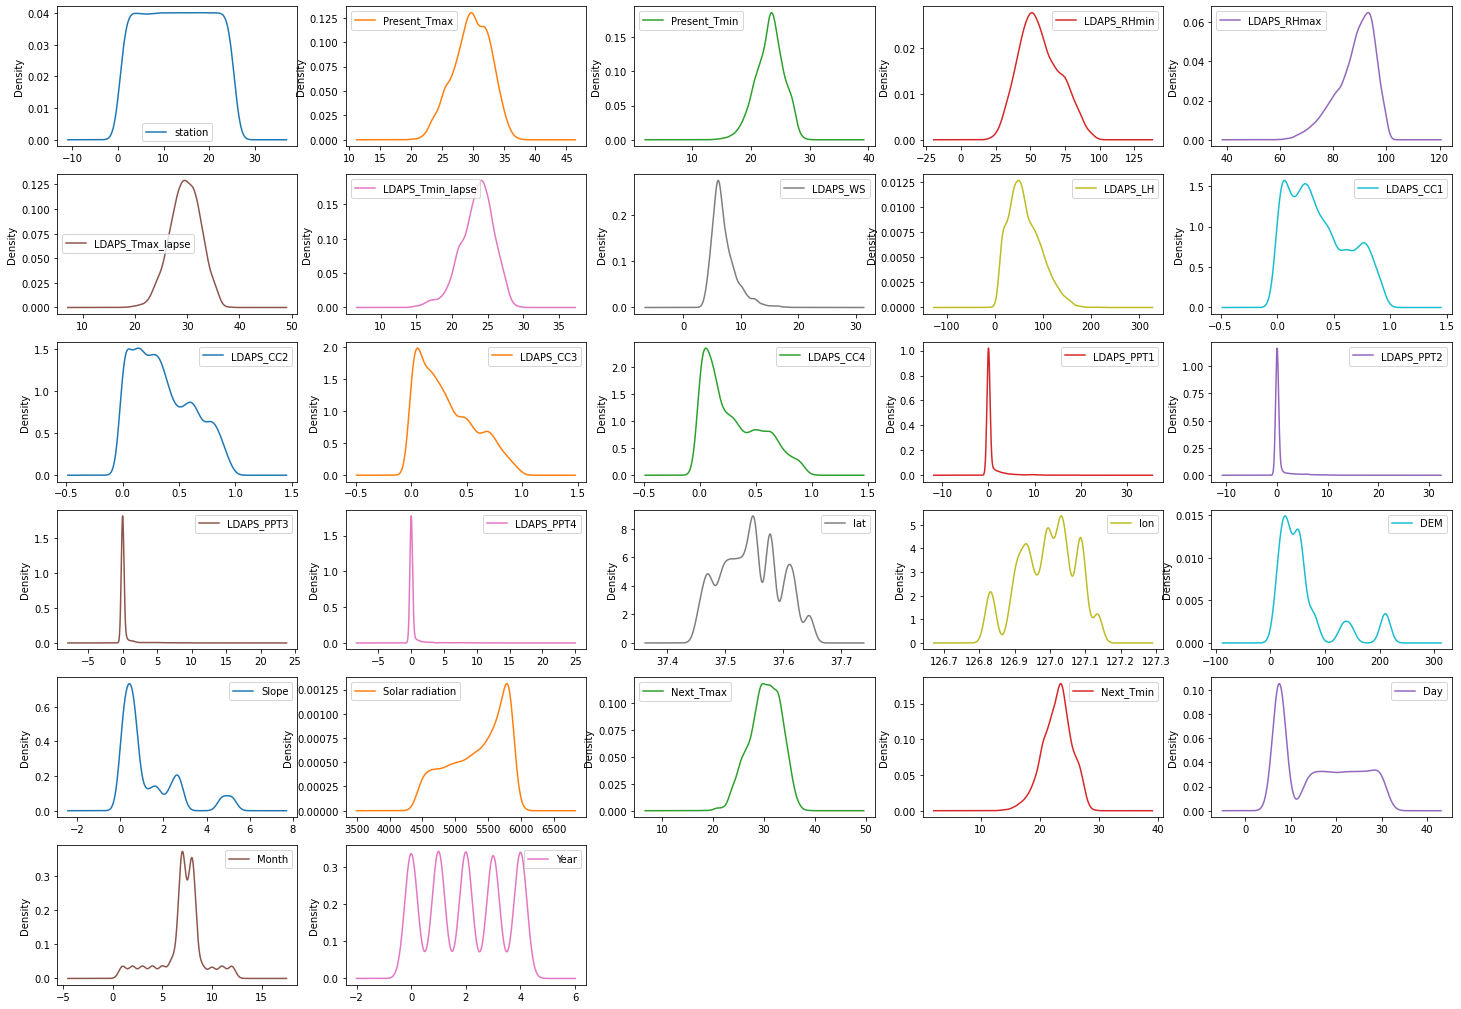

In [29]:
df.plot(kind='density', subplots= True, layout=(6,5), sharex=False, legend=True, figsize=[25,18])
plt.show

Here, we can check the distribution of all our columns.Most of the data seems to have a normal distribution. lets check closely.

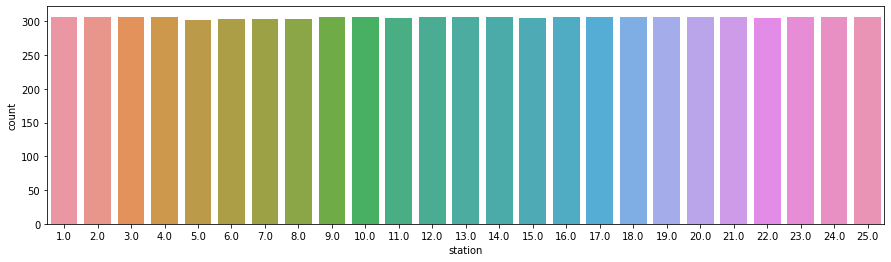

In [31]:
plt.figure(figsize=[15,4])
sns.countplot(df['station'])
plt.show()

We can see the data is equally distributed in the dataset.

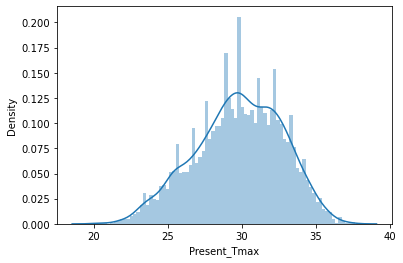

In [40]:
sns.distplot(df['Present_Tmax'], bins=80);

The data can be seen having a near normal distribution, with very little skewness.

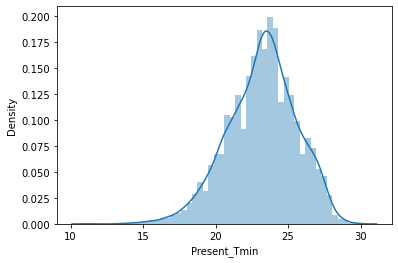

In [42]:
sns.distplot(df['Present_Tmin']);

Here too, the data shows a near normal distribution, with little skewness.

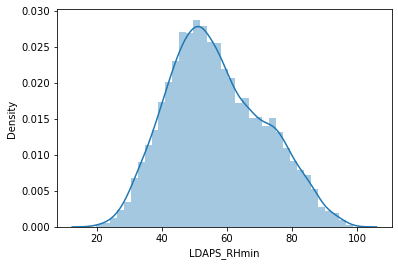

In [46]:
sns.distplot(df['LDAPS_RHmin']);

The data shows a near normal distribution with no skewness present.

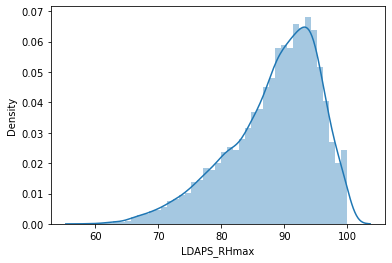

In [45]:
sns.distplot(df['LDAPS_RHmax']);

Here, the data can be seen having some skewness present. The data shows the level of max humidity increasing.

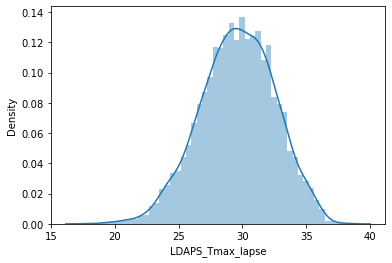

In [67]:
sns.distplot(df['LDAPS_Tmax_lapse']);

The data can be seen having a normal distribution, with very little skewness.

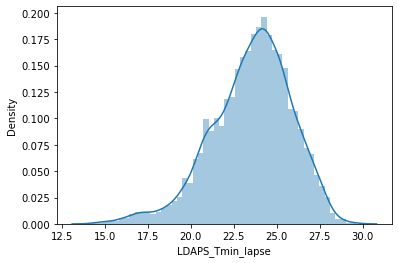

In [66]:
sns.distplot(df['LDAPS_Tmin_lapse']);

Data is nearly normally distributed here, with some skewness at the begining.

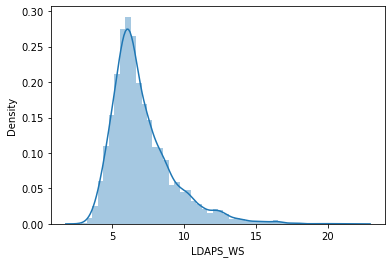

In [58]:
sns.distplot(df['LDAPS_WS']);

The data is normally distributed at the begining and has some skewness present at the end. right tailed skewed.

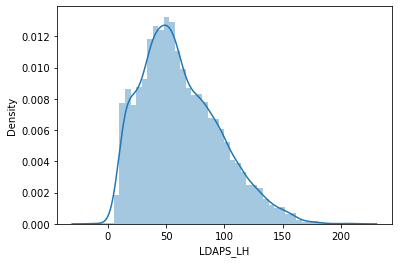

In [59]:
sns.distplot(df['LDAPS_LH']);

The data here can be seen having some variance and also some skewness present.

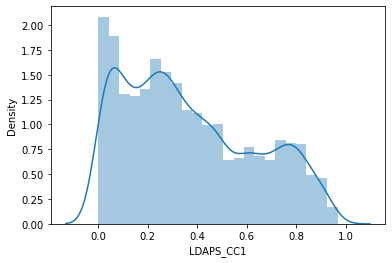

In [47]:
sns.distplot(df['LDAPS_CC1']);

Here, the cloud cover data has a lot of variance present. Also data can be seen gradually descreasing in the first split.

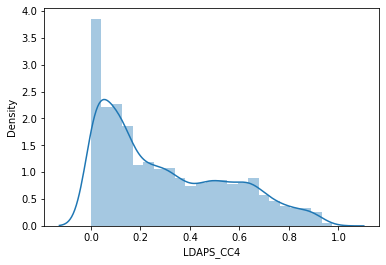

In [49]:
sns.distplot(df['LDAPS_CC4']);

Data here also has variance present, and the last split of cloud cover can also be seen gradually descreasing.

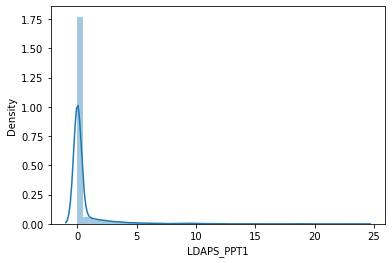

In [50]:
sns.distplot(df['LDAPS_PPT1']);

The data has a lot of skewness present. with majority of data being near 0. which means the probability of precipitation is very less in the first split.

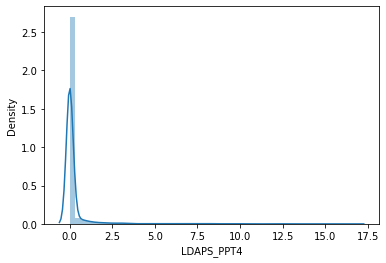

In [51]:
sns.distplot(df['LDAPS_PPT4']);

The precipitation data in the last split also shows lot of skewness, with probability of precipitation being very less.

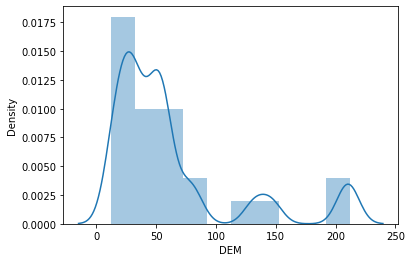

In [64]:
sns.distplot(df['DEM'], bins=10);

Data can be seen having a lot of variance, as it contains a location parameter.

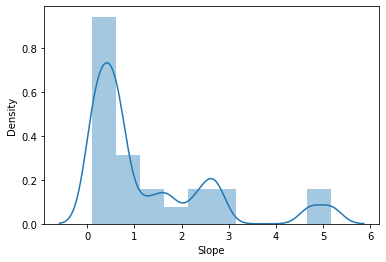

In [65]:
sns.distplot(df['Slope'], bins=10);

A lot of variance here as well, as it also contains a location parameter.

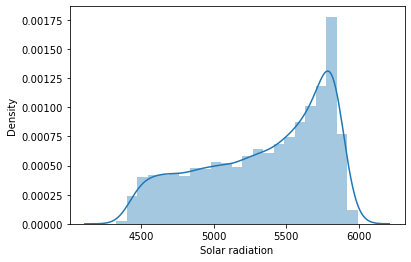

In [61]:
sns.distplot(df['Solar radiation']);

Here the data shows some variance as well as some skewness present, left tailed skewed.

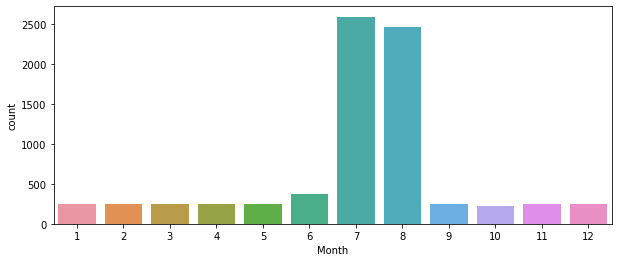

In [57]:
plt.figure(figsize=[10,4])
sns.countplot(df['Month'])
plt.show()

The data shows that majority of the data are from months of july and august.

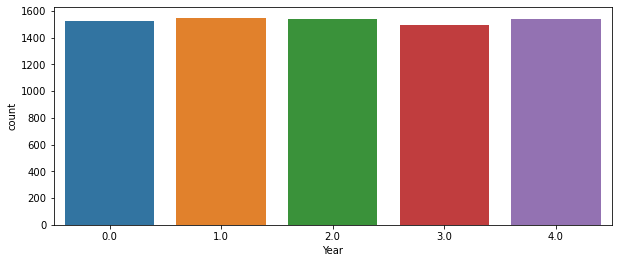

In [44]:
plt.figure(figsize=[10,4])
sns.countplot(df['Year'])
plt.show()

The data here can be seen distributed equally among the four years.

### Checking correlation

In [29]:
cor= df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.112909,0.132818,-0.068619,-0.169017,0.070405,0.105432,0.004466,-0.132861,0.005905,0.002195,-0.000415,0.005185,-0.003557,-0.009646,-0.014261,-0.011621,-0.238469,-0.118755,-0.257228,-0.091463,-0.020236,0.108579,0.128259,-0.000144,0.000370,0.001092
Present_Tmax,0.112909,1.000000,0.615208,-0.207996,-0.306090,0.571797,0.626312,-0.125532,0.133779,-0.315116,-0.216197,-0.145711,-0.142094,-0.114441,-0.104280,-0.126925,-0.105813,-0.053988,0.007651,-0.188743,-0.106822,-0.022013,0.608078,0.619049,-0.153630,-0.003256,0.055692
Present_Tmin,0.132818,0.615208,1.000000,0.121596,-0.018507,0.466282,0.769124,-0.038644,-0.012785,0.084020,0.089728,-0.004672,-0.046346,0.111113,0.065900,-0.052294,-0.069406,-0.081199,-0.044948,-0.253151,-0.148069,0.059528,0.461784,0.794409,-0.115140,-0.010173,0.037280
LDAPS_RHmin,-0.068619,-0.207996,0.121596,1.000000,0.578708,-0.568968,0.086273,0.291812,-0.072808,0.613201,0.744980,0.688652,0.512801,0.260374,0.390614,0.237664,0.165221,0.085831,-0.078049,0.101925,0.123169,0.243192,-0.446496,0.093525,-0.065843,-0.052845,-0.002809
LDAPS_RHmax,-0.169017,-0.306090,-0.018507,0.578708,1.000000,-0.377209,-0.117417,0.132796,0.237706,0.436276,0.391003,0.225859,0.129282,0.268282,0.228162,0.132484,0.115835,0.195513,0.025115,0.177711,0.219983,0.148402,-0.290102,-0.075815,-0.013031,-0.039333,-0.143621
LDAPS_Tmax_lapse,0.070405,0.571797,0.466282,-0.568968,-0.377209,1.000000,0.653320,-0.316285,0.044499,-0.440665,-0.526132,-0.543809,-0.431253,-0.116574,-0.249063,-0.194624,-0.166970,-0.044272,0.090616,-0.181668,-0.164176,0.046383,0.835606,0.590082,-0.161630,-0.022904,0.018029
LDAPS_Tmin_lapse,0.105432,0.626312,0.769124,0.086273,-0.117417,0.653320,1.000000,-0.133353,-0.138403,0.008993,0.045908,-0.045772,-0.081777,0.034450,-0.002782,-0.093480,-0.099826,-0.099021,-0.027018,-0.197844,-0.187815,0.158365,0.591945,0.886617,-0.179096,-0.027658,-0.003379
LDAPS_WS,0.004466,-0.125532,-0.038644,0.291812,0.132796,-0.316285,-0.133353,1.000000,0.003230,0.287090,0.258623,0.239415,0.218480,0.143133,0.183197,0.148422,0.132244,0.034125,-0.063340,0.189932,0.169789,0.121599,-0.351797,-0.101545,-0.030365,-0.081947,-0.114609
LDAPS_LH,-0.132861,0.133779,-0.012785,-0.072808,0.237706,0.044499,-0.138403,0.003230,1.000000,-0.148572,-0.265604,-0.247322,-0.173811,-0.019108,-0.084894,0.009076,0.012848,0.132059,0.024141,0.055258,0.087111,-0.047480,0.156993,-0.059107,-0.011586,-0.023867,0.056634
LDAPS_CC1,0.005905,-0.315116,0.084020,0.613201,0.436276,-0.440665,0.008993,0.287090,-0.148572,1.000000,0.779291,0.516487,0.360310,0.447020,0.389797,0.167147,0.089078,-0.009495,-0.008510,-0.015024,-0.021905,0.218366,-0.460129,-0.012845,-0.021709,-0.075858,-0.068088


Here we can see the correlation of our dataset, lets visualize it.

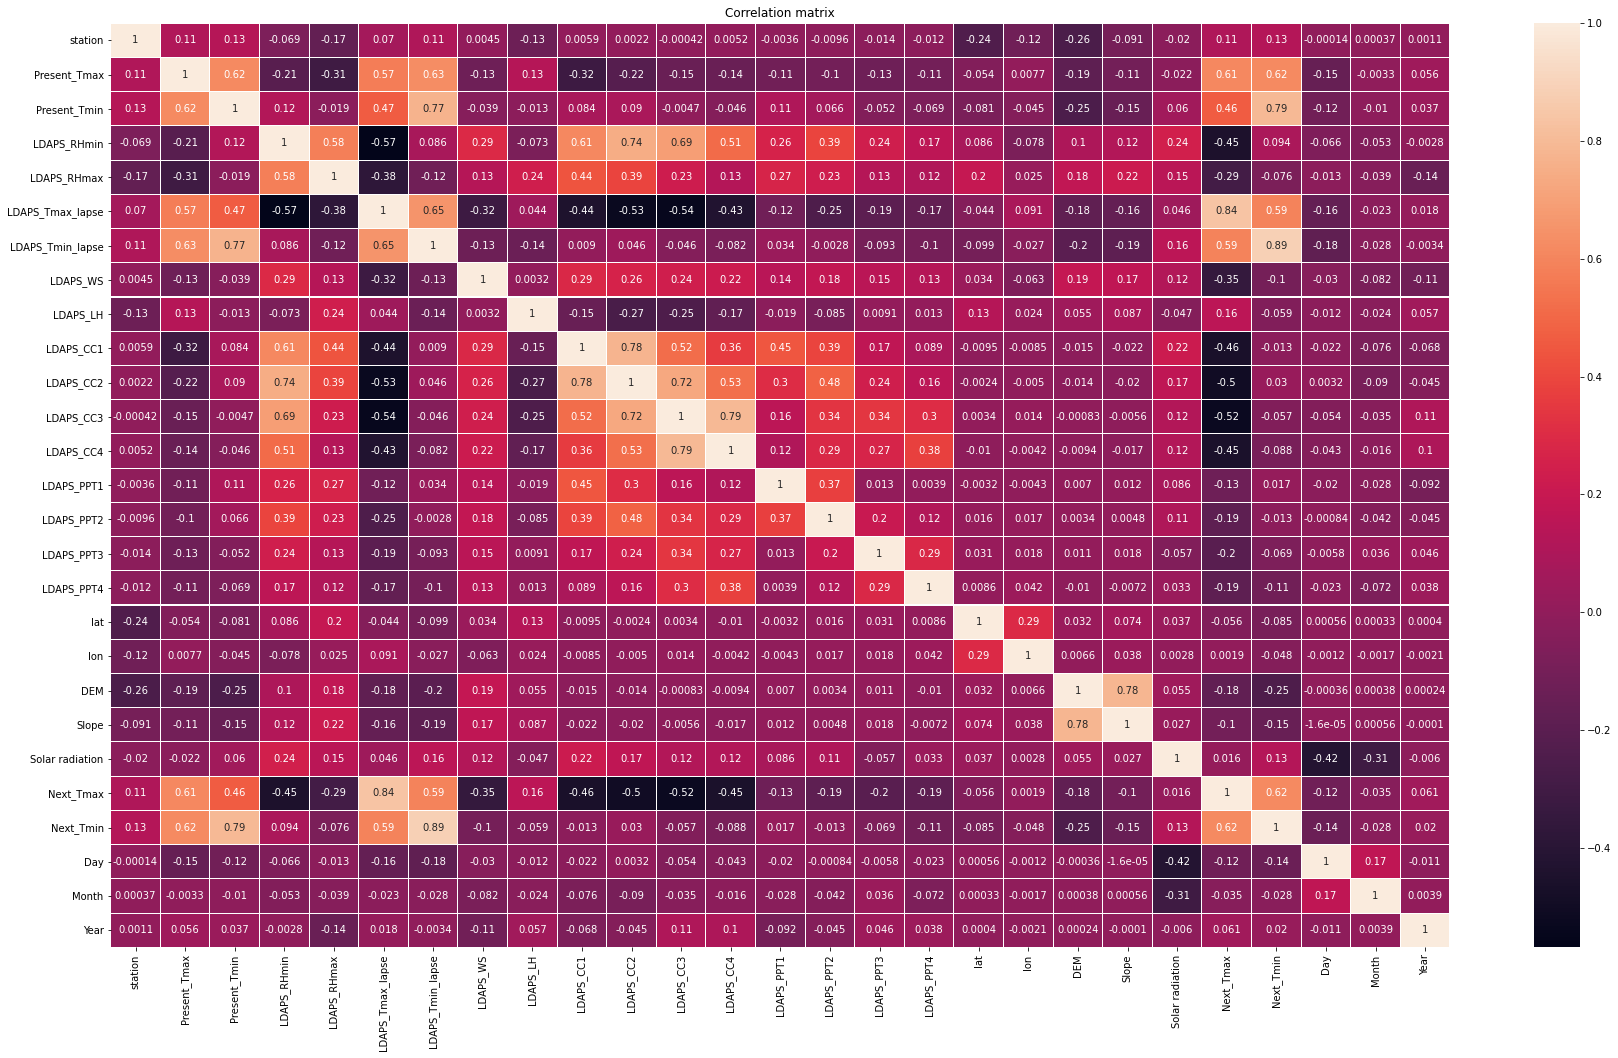

In [70]:
plt.figure(figsize=[30,17])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

In the correlation matrix, we can see some good correlation at the middle of the graph. Many negative correlations can also be seen as we check further. Among the independent columns, we can see 'min relative humidity' and ' maximum air temperature applied lapse rate' have a very negative correlation. while on the other hand, '3rd split cloud cover' and '4th split cloud cover' show a very positive correlation among them.

In [71]:
# Checking correlation of one target with independent columns.

cor['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835606
Next_Tmin           0.616451
Present_Tmax        0.608078
LDAPS_Tmin_lapse    0.591945
Present_Tmin        0.461784
LDAPS_LH            0.156993
station             0.108579
Year                0.061167
Solar radiation     0.015838
lon                 0.001889
Month              -0.034871
lat                -0.055545
Slope              -0.104970
Day                -0.121385
LDAPS_PPT1         -0.125929
DEM                -0.175303
LDAPS_PPT2         -0.187029
LDAPS_PPT4         -0.188317
LDAPS_PPT3         -0.204616
LDAPS_RHmax        -0.290102
LDAPS_WS           -0.351797
LDAPS_RHmin        -0.446496
LDAPS_CC4          -0.453908
LDAPS_CC1          -0.460129
LDAPS_CC2          -0.498909
LDAPS_CC3          -0.523502
Name: Next_Tmax, dtype: float64

We can check the correlation of one of our target with the independent columns. lets visualize it for better understanding.

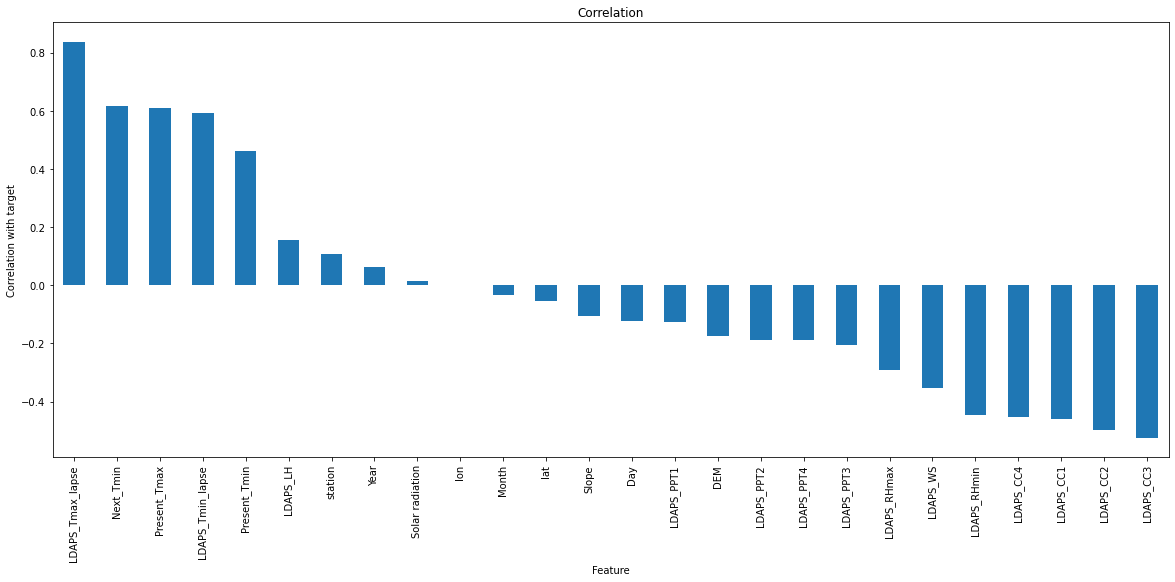

In [76]:
plt.figure(figsize=(20,8))
cor['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

The visualization shows that the 'tmax_lapse' has the highest positive correlation with our first target, followed by 'next_tmin' which is our 2nd target. The 'longitude' column has very less correlation. And we can see all the splits of 'cloud cover' have a very negative correlation with the taget.

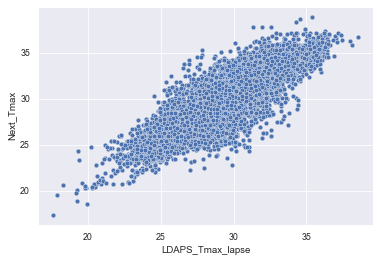

In [36]:
sns.set()
sns.set_context('paper')
sns.scatterplot(data= df, x='LDAPS_Tmax_lapse', y='Next_Tmax')
plt.show()

Here we have a very positive correlation between the columns, as both the data are of max air temperature. 

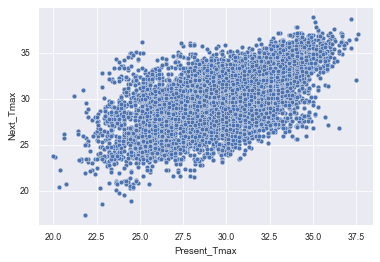

In [94]:
sns.scatterplot(data= df, x='Present_Tmax', y='Next_Tmax')
plt.show()

A positive correlation can be seen here, with the graph advancing upward.

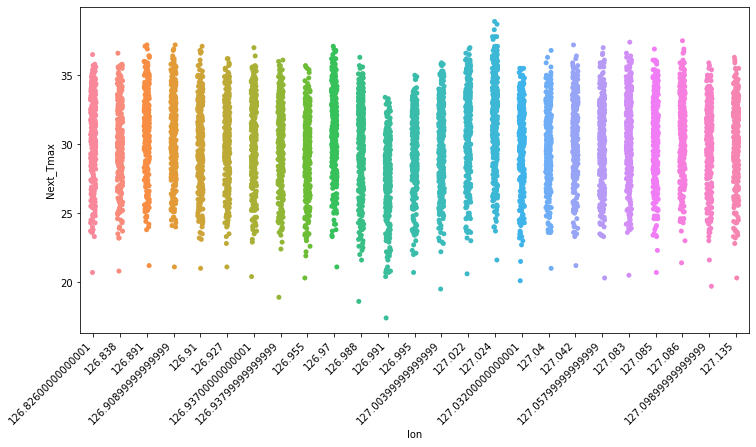

In [37]:
plt.figure(figsize=[12,6])
plt.xticks(rotation = 45, ha = 'right')
sns.stripplot(data= df, x='lon', y='Next_Tmax')
plt.show()

In between these two columns, no correlation can be seen.

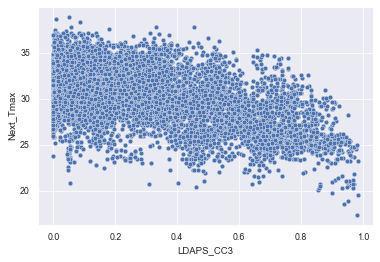

In [93]:
sns.scatterplot(data= df, x='LDAPS_CC3', y='Next_Tmax')
plt.show()

Here the graph shows a negative relation, we can see the data points going down.

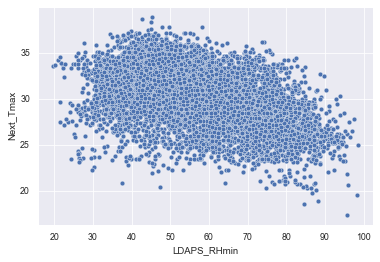

In [96]:
sns.scatterplot(data= df, x='LDAPS_RHmin', y='Next_Tmax')
plt.show()

Here too,we can see an overall negative correlation.

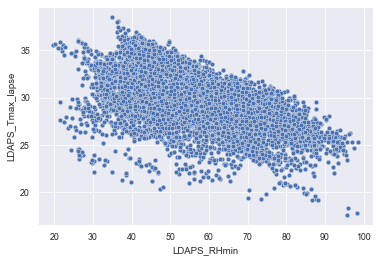

In [97]:
sns.scatterplot(data= df, x='LDAPS_RHmin', y='LDAPS_Tmax_lapse')
plt.show()

Here the graph shows the most negative correlation among the independent columns.

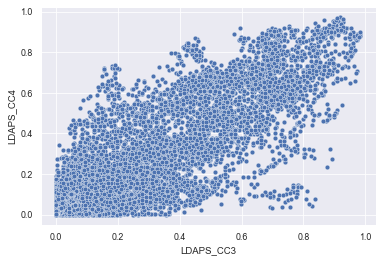

In [98]:
sns.scatterplot(data= df, x='LDAPS_CC3', y='LDAPS_CC4')
plt.show()

Among the independent columns, the graph shows the most positive correlation between the cloud cover splits.

In [30]:
# Checking correlation of 2nd target with independent columns.

cor['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886617
Present_Tmin        0.794409
Present_Tmax        0.619049
Next_Tmax           0.616451
LDAPS_Tmax_lapse    0.590082
station             0.128259
Solar radiation     0.125985
LDAPS_RHmin         0.093525
LDAPS_CC2           0.029869
Year                0.019957
LDAPS_PPT1          0.017188
LDAPS_PPT2         -0.012795
LDAPS_CC1          -0.012845
Month              -0.028305
lon                -0.047622
LDAPS_CC3          -0.057102
LDAPS_LH           -0.059107
LDAPS_PPT3         -0.069291
LDAPS_RHmax        -0.075815
lat                -0.085065
LDAPS_CC4          -0.087705
LDAPS_WS           -0.101545
LDAPS_PPT4         -0.111139
Day                -0.137448
Slope              -0.148577
DEM                -0.249072
Name: Next_Tmin, dtype: float64

We can see all the correlations of the 2nd target with the independent columns. Lets visualize it.

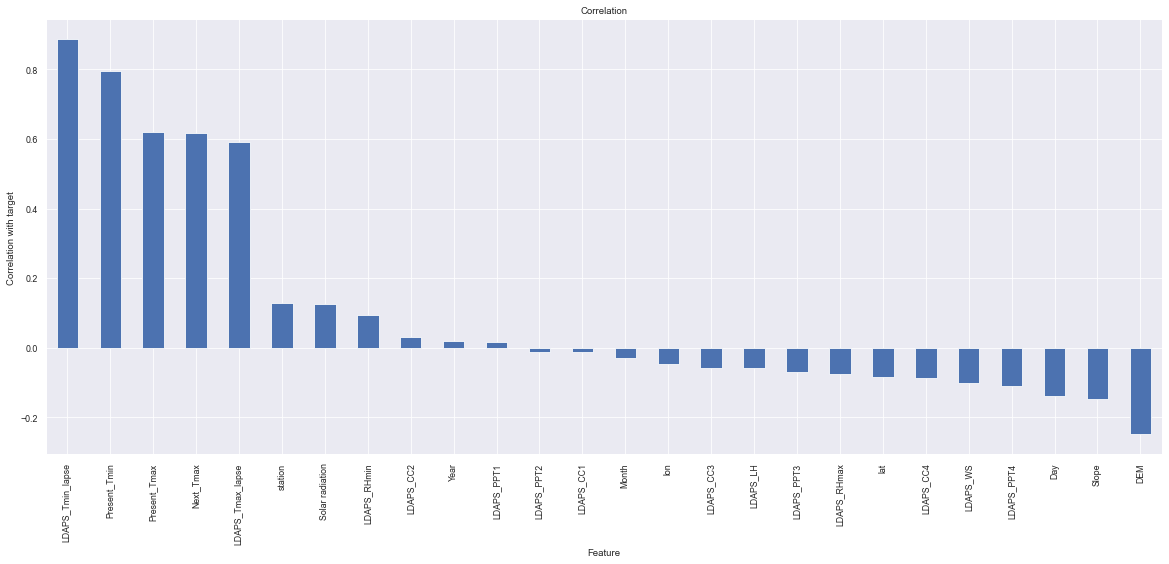

In [100]:
plt.figure(figsize=(20,8))
cor['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

We can see some very good positive correlation with our target, 'LDAPS_Tmin_lapse' shows the most positive relation, followed by
'present_tmin'. The columns 'LDAPS_PPT2' and 'LDAPS_CC1' are giving us a very low correlation. And 'DEM' is showing the most negative correlation with the target. Lets inspect closely.

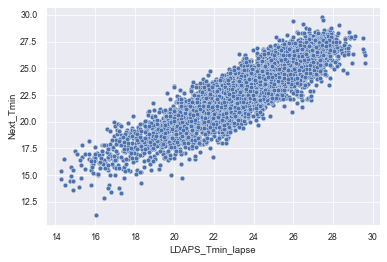

In [37]:
sns.scatterplot(data= df, x='LDAPS_Tmin_lapse', y='Next_Tmin')
plt.show()

Here we have a very positive correlation. as both the data are of minimun air temperature.

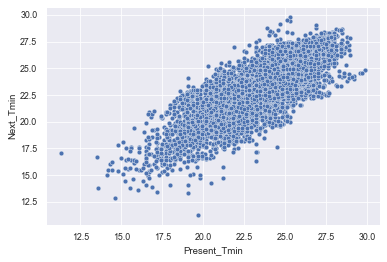

In [43]:
sns.scatterplot(data= df, x='Present_Tmin', y='Next_Tmin')
plt.show()

The data for present min temperature also has a very good positive correlation with the target.

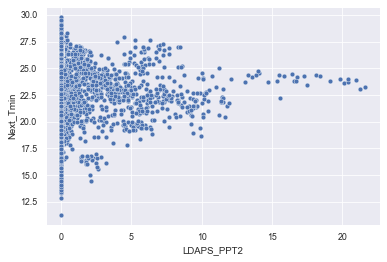

In [39]:
sns.scatterplot(data= df, x='LDAPS_PPT2', y='Next_Tmin')
plt.show()

Here, the graph shows no correlation among the columns.

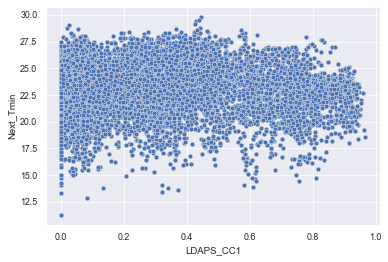

In [40]:
sns.scatterplot(data= df, x='LDAPS_CC1', y='Next_Tmin')
plt.show()

Here also, we can see the 1st split of cloud cover has no correlation with our 2nd target.

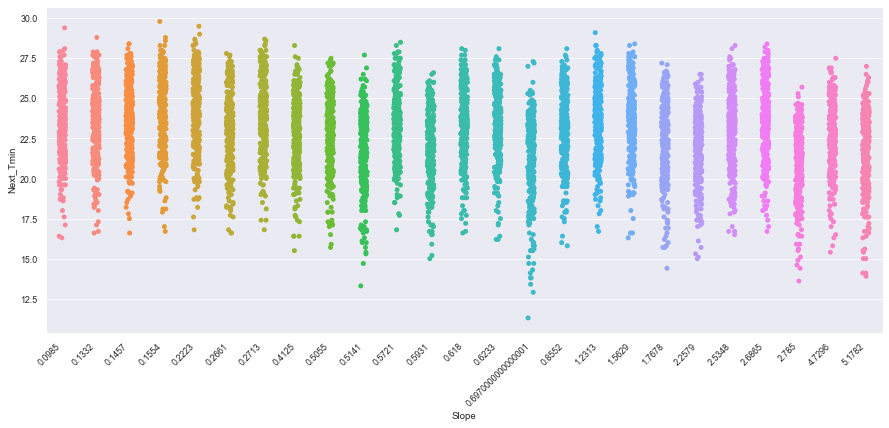

In [56]:
plt.figure(figsize=[15,6])
plt.xticks(rotation = 45, ha = 'right')
sns.stripplot(data= df, x='Slope', y='Next_Tmin')
plt.show()

In the grap, we can see slight negative correlation, as datapoints are getting reduced from the top.

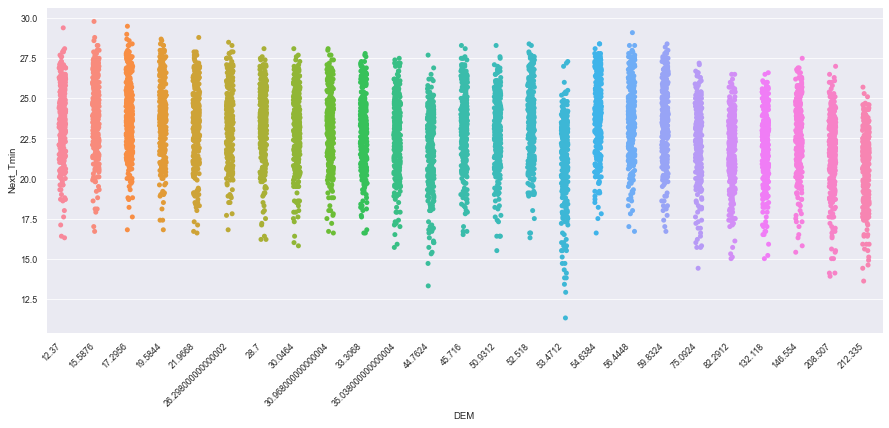

In [55]:
plt.figure(figsize=[15,6])
plt.xticks(rotation = 45, ha = 'right')
sns.stripplot(data= df, x='DEM', y='Next_Tmin')
plt.show()

Here the graph shows a negative relation of the elevation data with the target.

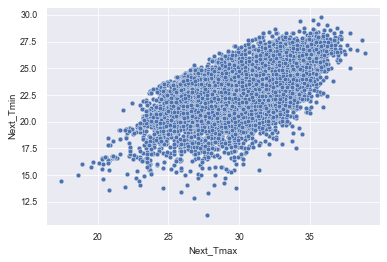

In [57]:
sns.scatterplot(data= df, x='Next_Tmax', y='Next_Tmin')
plt.show()

Here we can see the correlation of both our target columns. We have a very good positive correlation among them. Hence, we will use our one target as features to train the other target and vice versa.

## Checking for outliers

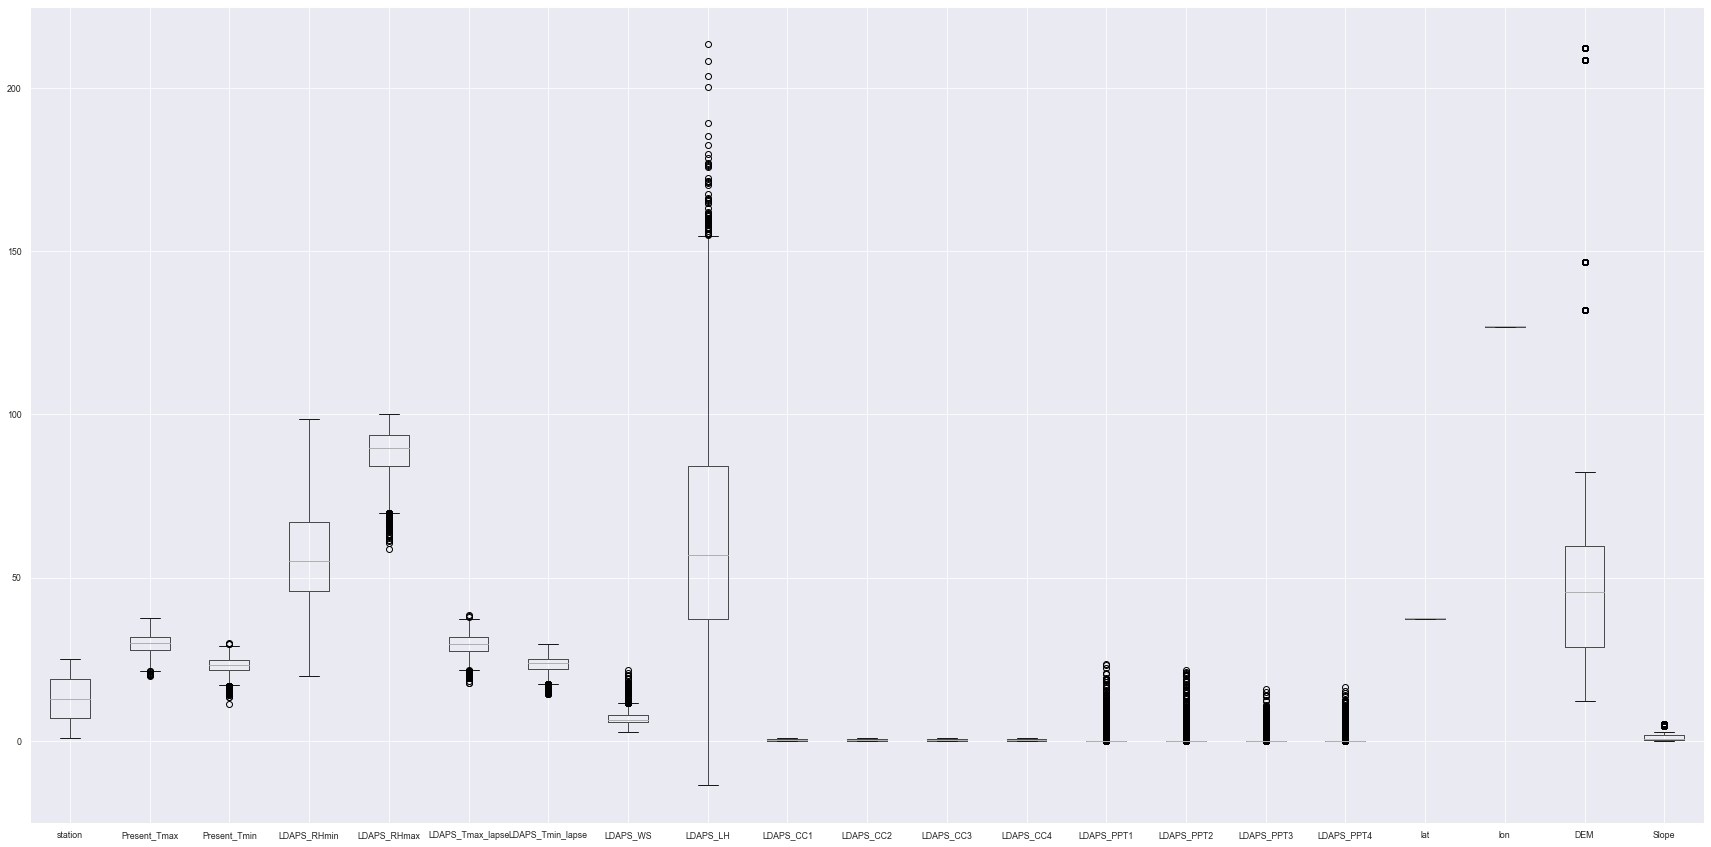

In [111]:
df.iloc[:,0:21].boxplot(figsize=[30,15])
plt.show()

Some outliers can be seen, lets inspect closely.

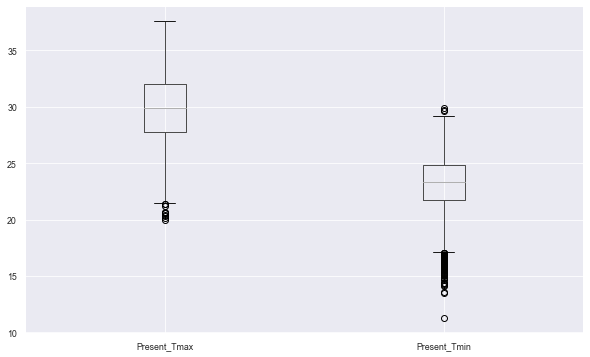

In [74]:
df.iloc[:,1:3].boxplot(figsize=[10,6])
plt.show()

Some outliers can be seen, but are very close to the threshold.

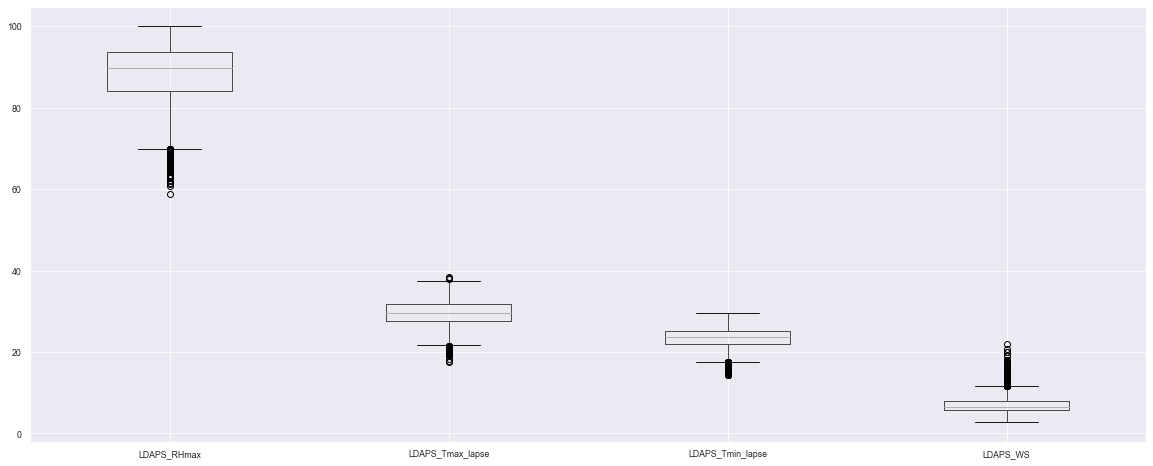

In [80]:
df.iloc[:,4:8].boxplot(figsize=[20,8])
plt.show()

Here also, some outliers can be seen in the columns, but are very close to the threshold.

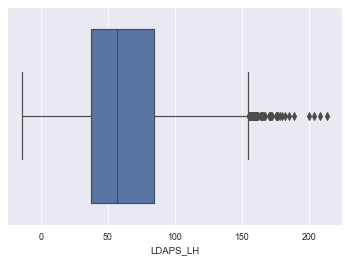

In [87]:
sns.boxplot(df['LDAPS_LH']);

Outliers present in the data, and are close to the threshold.

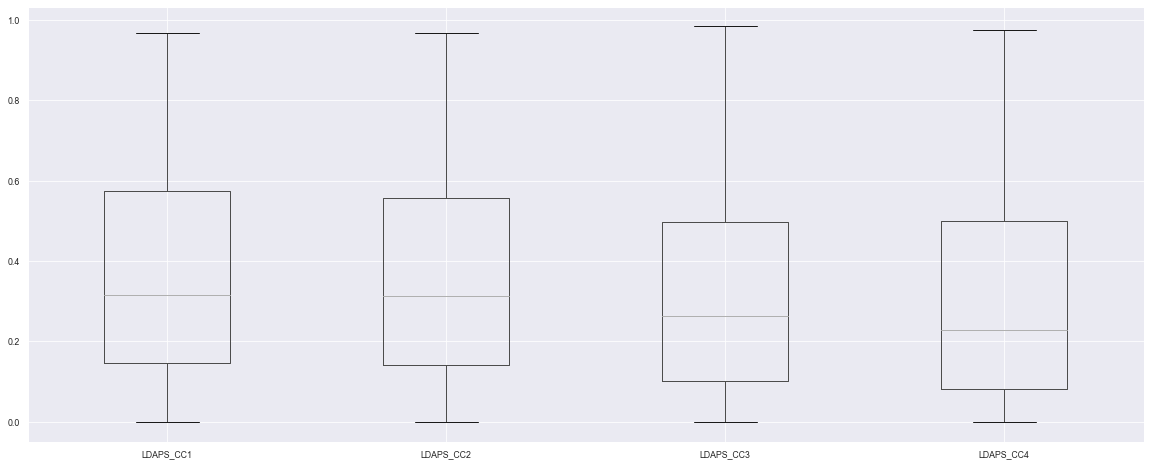

In [92]:
df.iloc[:,9:13].boxplot(figsize=[20,8])
plt.show()

No outliers present here.

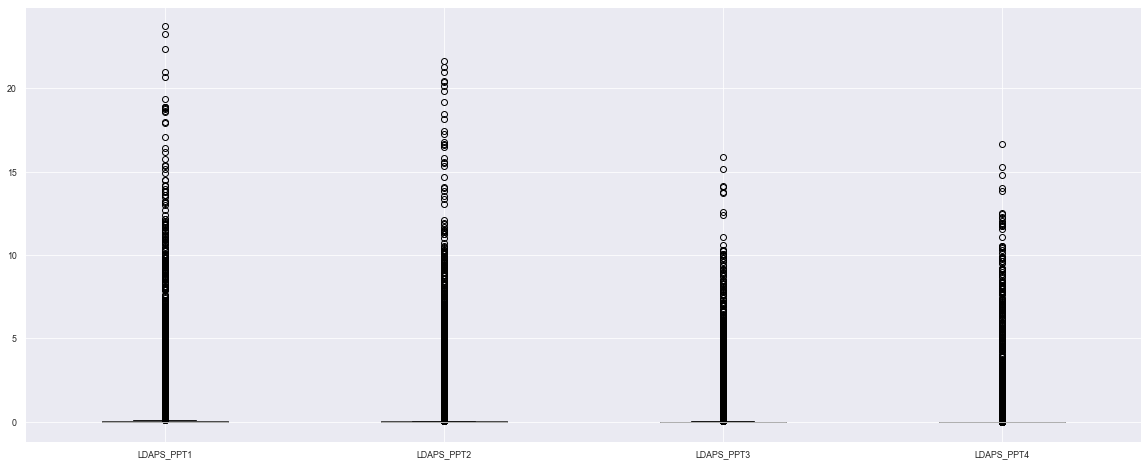

In [93]:
df.iloc[:,13:17].boxplot(figsize=[20,8])
plt.show()

Here, many outliers can be seen in precipitation columns.

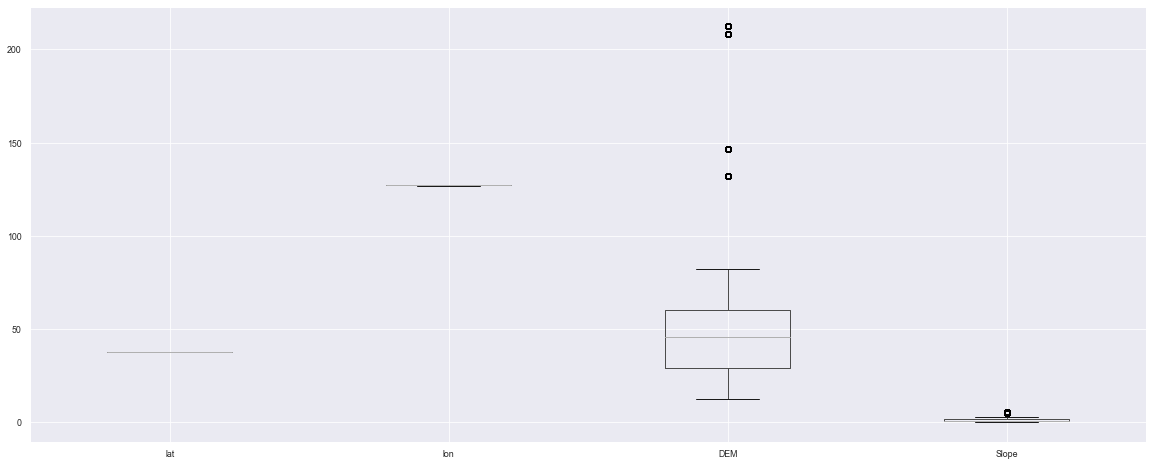

In [102]:
df.iloc[:,17:21].boxplot(figsize=[20,8])
plt.show()

We can see some outliers in DEM and slope, outliers in slope are very close to the threshold.

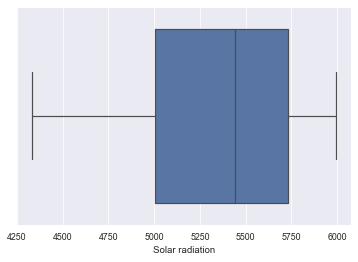

In [108]:
sns.boxplot(df['Solar radiation']);

In [113]:
# Removing the outliers.

from scipy.stats import zscore

z= np.abs(zscore(df))

df_new= df[(z<3).all(axis=1)]  # we gave a threshold of 3.
df_new.shape

(6792, 27)

In [114]:
df.shape

(7648, 27)

In [115]:
loss=(7648-6792)/7648*100
loss

11.192468619246862

The data loss we are getting is very high, hence it would not be appropiate to remove the outliers. Also, the majority of outliers 
present are very close to the threshold. So, we will not remove the outliers.

## Checking for skewness

In [98]:
df.skew()

station            -0.002800
Present_Tmax       -0.258241
Present_Tmin       -0.355505
LDAPS_RHmin         0.301532
LDAPS_RHmax        -0.845614
LDAPS_Tmax_lapse   -0.222652
LDAPS_Tmin_lapse   -0.575089
LDAPS_WS            1.550978
LDAPS_LH            0.663598
LDAPS_CC1           0.458080
LDAPS_CC2           0.472555
LDAPS_CC3           0.638484
LDAPS_CC4           0.662400
LDAPS_PPT1          5.303822
LDAPS_PPT2          5.692702
LDAPS_PPT3          6.348470
LDAPS_PPT4          6.718651
lat                 0.086463
lon                -0.286661
DEM                 1.721727
Slope               1.560855
Solar radiation    -0.523740
Next_Tmax          -0.335304
Next_Tmin          -0.393463
Day                 0.246031
Month              -0.698259
Year                0.009068
dtype: float64

We can see some skewness in few columns. Our target columns do not have skewness, so we can split the dataset later.

In [99]:
# Applying cube root transformation to treat skewness.

colms=['LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope']

for i in df[colms]:
    df[i]=np.cbrt(df[i].values.reshape(-1,1))

df.skew()

station            -0.002800
Present_Tmax       -0.258241
Present_Tmin       -0.355505
LDAPS_RHmin         0.301532
LDAPS_RHmax        -0.845614
LDAPS_Tmax_lapse   -0.222652
LDAPS_Tmin_lapse   -0.575089
LDAPS_WS            0.877135
LDAPS_LH            0.663598
LDAPS_CC1           0.458080
LDAPS_CC2           0.472555
LDAPS_CC3           0.638484
LDAPS_CC4           0.662400
LDAPS_PPT1          1.958606
LDAPS_PPT2          2.266440
LDAPS_PPT3          2.572027
LDAPS_PPT4          2.844112
lat                 0.086463
lon                -0.286661
DEM                 0.919614
Slope               0.613218
Solar radiation    -0.523740
Next_Tmax          -0.335304
Next_Tmin          -0.393463
Day                 0.246031
Month              -0.698259
Year                0.009068
dtype: float64

The skewness in data has been minimized. We can proceed.

### Splitting data into target and features.

In [100]:
# for model having target of max_temp

x1= df.drop(['Next_Tmax'], axis=1)
y1= df['Next_Tmax']

# for model having target of min_temp

x2= df.drop(['Next_Tmin'], axis=1)
y2= df['Next_Tmin']

### Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x1= pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x2= pd.DataFrame(scaler.fit_transform(x2), columns=x2.columns)

## Building model for the target 'Next max air temperature'.

### Finding best random state

In [104]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.8160798508048701 on random state 105


We found the best score at random state 105

In [141]:
# Creating train-test split using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x1,y1, test_size=.25,random_state=105)

## Model Training

In [128]:
# Importing Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

In [121]:
models= [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(), SVR(), Lasso()]

for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm= m.predict(x_test)
    
    print('Model: ', m,'\n')
    print('Score: ',m.score(x_train,y_train))
    print('r2 score: ', r2_score(y_test,predm))
    print('Mean absolute error:', mean_absolute_error(y_test,predm))
    print('Mean squared error:', mean_squared_error(y_test,predm))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm)))
    print('\n\n\n')

Model:  LinearRegression() 

Score:  0.7942028943336628
r2 score:  0.8160798508048701
Mean absolute error: 1.0286451859357313
Mean squared error: 1.7854802120528095
Root mean squared error: 1.336218624347382




Model:  DecisionTreeRegressor() 

Score:  1.0
r2 score:  0.7954014924133533
Mean absolute error: 0.9876569037656903
Mean squared error: 1.986223849372385
Root mean squared error: 1.4093345413252258




Model:  KNeighborsRegressor() 

Score:  0.93269819618455
r2 score:  0.8984174546182055
Mean absolute error: 0.7421861924686194
Mean squared error: 0.9861541841004187
Root mean squared error: 0.9930529613773974




Model:  RandomForestRegressor() 

Score:  0.9873412258556283
r2 score:  0.917507898816875
Mean absolute error: 0.6709508368200835
Mean squared error: 0.8008258744769874
Root mean squared error: 0.8948887497767459




Model:  SVR() 

Score:  0.9216992566682062
r2 score:  0.9065037656110353
Mean absolute error: 0.7034291597483283
Mean squared error: 0.9076530066634391
Roo

We can see most of the models are performing very well. But this may be due to overfitting, Lets check using cross validation for over and underfitting. 

### Checking cross validation score

In [123]:
from sklearn.model_selection import cross_val_score

In [125]:
for v in models:
    scr= cross_val_score(v, x1, y1, cv=5)
    print('Cross validation score for',v,': ',scr.mean())
    print('\n\n')

Cross validation score for LinearRegression() :  0.718554119432185



Cross validation score for DecisionTreeRegressor() :  0.45713907998774017



Cross validation score for KNeighborsRegressor() :  0.5550435208711345



Cross validation score for RandomForestRegressor() :  0.7064717380206067



Cross validation score for SVR() :  0.6969118064016195



Cross validation score for Lasso() :  0.5532243945076549





We can see that random forest and Linear reg are giving us the best score. But the difference between the cv score and r2 score is the least in Lasso model. lets hyperparameter tune them and find the best model.

### Hyper parameter tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV

par1= {'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(RandomForestRegressor(), par1, cv=5) 
rcvfr.fit(x_train,y_train)
rcvfr.best_params_

{'max_features': 'sqrt', 'criterion': 'mse'}

In [127]:
# Now using the above parameter which is found to be best, we create our model.

maxtemp_mod1= RandomForestRegressor(max_features= 'sqrt', criterion= 'mae')
maxtemp_mod1.fit(x_train,y_train)
predm1=maxtemp_mod1.predict(x_test)

print('Score: ',maxtemp_mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predm1))
print('Mean absolute error:', mean_absolute_error(y_test,predm1))
print('Mean squared error:', mean_squared_error(y_test,predm1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm1)))

Score:  0.9883229799533161
r2 score:  0.9275485553974399
Mean absolute error: 0.6355839435146449
Mean squared error: 0.7033520864278249
Root mean squared error: 0.838660888814916


With the random forest model we are getting a training score of 98% and an r2 score of 92%. with the errors being very less.

In [129]:
from sklearn.model_selection import GridSearchCV

par2= {'selection' : ['cyclic', 'random'], 'alpha': [ 0.0001, 0.001,0.01,0.1,1]}

gcvls= GridSearchCV(Lasso(),par2,cv=5) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 0.001, 'selection': 'random'}

In [131]:
# Now using the above parameter which is found to be best, we create our model.

maxtemp_mod2= Lasso(selection='random', alpha= 0.001)
maxtemp_mod2.fit(x_train,y_train)
predm2=maxtemp_mod2.predict(x_test)

print('Score: ',maxtemp_mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predm2))
print('Mean absolute error:', mean_absolute_error(y_test,predm2))
print('Mean squared error:', mean_squared_error(y_test,predm2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm2)))

Score:  0.7941922158623005
r2 score:  0.8160511687375125
Mean absolute error: 1.02863950743626
Mean squared error: 1.7857586549745437
Root mean squared error: 1.336322810916039


Using Lasso, we are getting a training score of 79% and r2 score of 82% with very less erors.

In [142]:
lr= LinearRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.7942028943336628
r2 score:  0.8160798508048701
Mean absolute error: 1.0286451859357313
Mean squared error: 1.7854802120528095
Root mean squared error: 1.336218624347382


Linear reg model gave us a training score of 79% and r2 score of 81%. and errors are very less.

By analysing all the models, we can say that random forest is giving us the best score. But the difference between the r2 score and cv score in random forest and linear reg models are high as compared to Lasso, this may be due to overfitting. Hence we will make Lasso regularization model as our final model for the first target.

## Building model for the target 'Next min air temperature'

### Finding the best random state

In [134]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x2,y2, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.8631787043813746 on random state 111


In [143]:
# Creating train-test split using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x2,y2, test_size=.25,random_state=111)

### Model Training

In [136]:
models= [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor(), SVR(), Lasso()]

for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm= m.predict(x_test)
    
    print('Model: ', m,'\n')
    print('Score: ',m.score(x_train,y_train))
    print('r2 score: ', r2_score(y_test,predm))
    print('Mean absolute error:', mean_absolute_error(y_test,predm))
    print('Mean squared error:', mean_squared_error(y_test,predm))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm)))
    print('\n\n\n')

Model:  LinearRegression() 

Score:  0.8484436278085223
r2 score:  0.8631787043813746
Mean absolute error: 0.7421722129751624
Mean squared error: 0.8713702994077106
Root mean squared error: 0.9334721738797095




Model:  DecisionTreeRegressor() 

Score:  1.0
r2 score:  0.7993751398616815
Mean absolute error: 0.8342573221757321
Mean squared error: 1.2777144351464433
Root mean squared error: 1.130360312089222




Model:  KNeighborsRegressor() 

Score:  0.9277844570883108
r2 score:  0.8945766984492693
Mean absolute error: 0.6265062761506277
Mean squared error: 0.6714066945606695
Root mean squared error: 0.8193941021026875




Model:  RandomForestRegressor() 

Score:  0.9872567739328807
r2 score:  0.9155120090767437
Mean absolute error: 0.5575486401673642
Mean squared error: 0.5380765151673643
Root mean squared error: 0.7335369896381261




Model:  SVR() 

Score:  0.9454147554569654
r2 score:  0.9291532454297909
Mean absolute error: 0.4965113644642732
Mean squared error: 0.4511999207636783

All the models can be seen performing very good, But this may be because of overfitting, Lets check the cv score for over and under fitting.

### Checking Cross Validation score

In [137]:
for v in models:
    scr= cross_val_score(v, x2, y2, cv=5)
    print('Cross validation score for',v,': ',scr.mean())
    print('\n\n')

Cross validation score for LinearRegression() :  0.794176427361523



Cross validation score for DecisionTreeRegressor() :  0.5670281621536468



Cross validation score for KNeighborsRegressor() :  0.5939572348897789



Cross validation score for RandomForestRegressor() :  0.7945901380781627



Cross validation score for SVR() :  0.7394660980319283



Cross validation score for Lasso() :  0.5633514036763029





We can see random forest and linear reg models are giving us the best score, But the difference between the cv score and r2 score is less in
Lasso and linear reg as compared to other models, which are more likely to be overfitted. Lets hyperparameter tune Lasso model and see which model is performing better among the two. 

### Hyper parameter tuning

In [138]:
par= {'selection' : ['cyclic', 'random'], 'alpha': [ 0.0001, 0.001,0.01,0.1,1]}

gcvls= GridSearchCV(Lasso(),par,cv=5) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 0.001, 'selection': 'random'}

In [149]:
# Now using the above parameters which are found to be best, we create our model.

mintemp_mod= Lasso(selection='random', alpha= 0.001)
mintemp_mod.fit(x_train,y_train)
predm=mintemp_mod.predict(x_test)

print('Score: ',mintemp_mod.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predm))
print('Mean absolute error:', mean_absolute_error(y_test,predm))
print('Mean squared error:', mean_squared_error(y_test,predm))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predm)))

Score:  0.8484265116615948
r2 score:  0.86322833941834
Mean absolute error: 0.7420860630630454
Mean squared error: 0.8710541900124136
Root mean squared error: 0.9333028393894521


Using Lasso, we are getting a training score of 84% and the r2 score of 86%, with errors being very less.

In [151]:
lr_final= LinearRegression()
lr_final.fit(x_train,y_train)
predlr= lr_final.predict(x_test)

print('Score: ',lr_final.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.8484436278085223
r2 score:  0.8631787043813746
Mean absolute error: 0.7421722129751624
Mean squared error: 0.8713702994077106
Root mean squared error: 0.9334721738797095


Linear reg model gave us a training score of 84% and r2 score of 86%. with very less errors.

Analysing both the models we can say, both Lasso and linear reg are giving us the same scores as well as same errors. And since Linear 
reg model gave us a higher score initially, We will make Linear Regression model our final model for the 2nd target.

## Saving the models

In [150]:
import joblib

# For the target 'Next maximum air temperature'

joblib.dump(maxtemp_mod2,'max_temperature_forecast.pkl')

['max_temperature_forecast.pkl']

In [152]:
# For the target 'Next minimum air temperature'

joblib.dump(lr_final,'min_temperature_forecast.pkl')

['min_temperature_forecast.pkl']